# Trying Raf's Sectionate Code
*Akira Di Sandro, 6/18/20*
<br>
In this notebook, I will be using Raf's Sectionate Code to make a zigzag across a diagonal cross section I want to make.

## 1. Import packages

In [1]:
%matplotlib inline
import sectionate
import xarray as xr

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

## 2. Load in Dataset

In [4]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [5]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', table_id='Omon', variable_id=['uo','vo','wo'], grid_label='gn')
dog.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,uo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,vo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN


In [6]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())

Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:04<00:00,  4.26s/it]


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [7]:
CM4_hist = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
CM4_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, x: 1440, y: 1080)
Coordinates:
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
  * bnds       (bnds) float64 1.0 2.0
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    institution:             National Oceanic and Atmospheric Administration,...
    parent_variant_label:    r1i1p1f1
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    comment:                 <null ref>
    realization_index:       1
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    parent_experiment_id:    piControl
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    frequency:               mon
    branch_time_in_parent:   36500.0
    realm:                   ocean
    parent_activity_id:      CMIP
    data_specs_version:      01.00.27
    source_type:             AOGCM
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    initialization_index:    1
    physics_index:           1
    mip_era:                 CMIP6
    table_id:                Omon
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    variant_label:           r1i1p1f1
    branch_method:           standard
    experiment:              historical
    parent_mip_era:          CMIP6
    contact:                 gfdl.climate.model.info@noaa.gov
    references:              see further_info_url attribute
    institution_id:          NOAA-GFDL
    branch_time_in_child:    0.0
    experiment_id:           historical
    source_id:               GFDL-CM4
    grid_label:              gn
    history:                 File was processed by fremetar (GFDL analog of C...
    forcing_index:           1
    product:                 model-output
    parent_time_units:       days since 0001-1-1
    tracking_id:             hdl:21.14100/d0ebcd36-d2cd-442e-a8d9-8f7a27168a2...
    parent_source_id:        GFDL-CM4
    variant_info:            N/A
    activity_id:             CMIP
    sub_experiment_id:       none
    status:                  2019-08-06;created;by nhn2@columbia.edu
    sub_experiment:          none
    nominal_resolution:      25 km
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

## 3. Select Endpoints of Diagonal

In [8]:
diag_cs = CM4_hist.sel(time='2012').mean(dim='time').sel(member_id='r1i1p1f1', y=slice(-10.0,-7.0)).sel(x=slice(-211,-204))
diag_cs

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, x: 28, y: 12)
Coordinates:
    lat        (y, x) float32 dask.array<chunksize=(12, 28), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(12, 28), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * y          (y) float64 -9.95 -9.703 -9.457 -9.21 ... -7.726 -7.479 -7.231
  * bnds       (bnds) float64 1.0 2.0
  * x          (x) float64 -210.9 -210.7 -210.4 -210.2 ... -204.7 -204.5 -204.2
    member_id  <U8 'r1i1p1f1'
Data variables:
    uo         (lev, y, x) float32 dask.array<chunksize=(35, 12, 28), meta=np.ndarray>
    vo         (lev, y, x) float32 dask.array<chunksize=(35, 12, 28), meta=np.ndarray>

In [9]:
#define starting point of diagonal as the top left point, (-211,-7)
startpt = [float(diag_cs.x[0]), float(diag_cs.y[-1])]
#define end point of diagonal as the bottom right point, (-202,-10)
endpt = [float(diag_cs.x[-1]), float(diag_cs.y[0])]

In [10]:
#pick 2 points
lon1 = float(diag_cs.x[0]) ; lat1 = float(diag_cs.y[-1])
lon2 = float(diag_cs.x[-1]) ; lat2 = float(diag_cs.y[0])

In [8]:
#use the points usedfor aki_example2.ipynb
lat1= -4.495381
lon1= -208.21236
lat2= -5.989064
lon2= -205.234668

## 4. Getting to Business

In [ ]:
isec, jsec, xsec, ysec = sectionate.create_section(CM4_hist['lon'], CM4_hist['lat'], lon1, lat1, lon2, lat2)

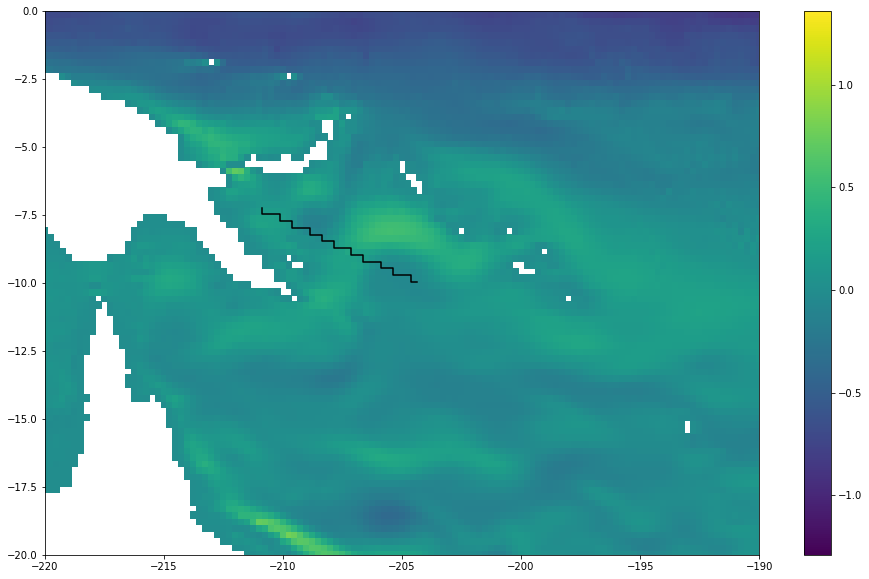

In [14]:
plt.figure(figsize=[16,10])
plt.pcolormesh(CM4_hist['lon'], CM4_hist['lat'], CM4_hist['uo'].isel(time=0, lev=0, member_id=0))
plt.plot(xsec, ysec, 'k')
plt.axis([-220,-190, -20, 0])
plt.colorbar()
plt.show()